# SynCat demo
SynCat is a galaxy catalogue synthesizer preserving the distribution of properties.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
from pypelid.sky.catalogue import Catalogue
from pypelid.sky.catalogue_store import CatalogueStore
from pypelid.vm.syncat import SynCat
import plot_utils

/Users/ben/.virtualenvs/pypelid/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
S = SynCat(verbose=1, ncomponents=15, quick=False, overwrite=True, hints_file='in/syn_hints.txt')
print S.config

{'hints_file': 'in/syn_hints.txt', 'out_cat': 'out/syn.pypelid.hdf5', 'skip': ['id', 'skycoord'], 'in_cat': 'in/galaxies.pypelid.hdf5', 'cat_model': 'out/syn.pickle', 'syn': False, 'nrandom': 1000000.0, 'ncomponents': 15, 'quick': False, 'fit': False, 'overwrite': True, 'verbose': 1}


In [4]:
S.fit_catalogue()

INFO:pypelid.vm.syncat:got hint for 'pa': instruction is uniform with range: 0.0, 180.0
INFO:pypelid.vm.syncat:got hint for 'z': instruction is truncate with range: 0.005, 6.0
INFO:pypelid.vm.syncat:got hint for 'ell': instruction is truncate with range: 0.0, 1.0
INFO:pypelid.vm.syncat:got hint for 'rbulge': instruction is truncate with range: 0.0, 10.0
INFO:pypelid.vm.syncat:got hint for 'rdisk': instruction is truncate with range: 0.0, 10.0
INFO:pypelid.vm.syncat:got hint for 'ell': instruction is smooth with range: 0.01, None
INFO:pypelid.vm.syncat:loading in/galaxies.pypelid.hdf5
INFO:pypelid.vm.syncat:ignoring column 'COSMOS_id' because it includes the string 'id'.
INFO:pypelid.vm.syncat:ignoring column 'Imodel_id' because it includes the string 'id'.
INFO:pypelid.vm.syncat:ignoring column 'skycoord' because it includes the string 'skycoord'.
INFO:pypelid.vm.syncat:got these 11 columns:
  1 ew_Ha
  2 rdisk
  3 rbulge
  4 ell
  5 ilbert_type
  6 bt
  7 ebv
  8 pa
  9 mag
 10 z
 11 

In [5]:
labels = S.labels

In [6]:
randoms = S.syn.sample(1851066)
print randoms.shape

INFO:pypelid.vm.syn:drawing samples: n=1.85107e+06
INFO:pypelid.vm.syn:random sampling from uniform distribution 0.0 180.0 1851066


(1851066, 11)


In [7]:
# load data
with CatalogueStore('in/galaxies.pypelid.hdf5') as store:
    cat = Catalogue(store)
data = []
for name in S.labels:
    data.append(getattr(cat,name))
data = np.transpose(data)

In [8]:
for i in range(randoms.shape[1]):
    print S.syn.labels[i], randoms[:,i].min(),randoms[:,i].max(),data[:,i].min(),data[:,i].max()

ew_Ha 0.0 237493.417616 0.0 13225.7998047
rdisk 0.0 6.74839614209 0.0 10.2159004211
rbulge 0.0 5.50131630565 0.0 3.69390010834
ell 0.0288064302951 0.999996898754 0.0230000000447 1.0
ilbert_type 1.0 18.0 1.0 18.0
bt 0.0 1.0 0.0 1.0
ebv 0.0 0.5 0.0 0.5
pa 3.5788438173e-05 179.999796088 0.0 180.0
mag 13.4310202215 33.2558619993 14.779999733 31.4300003052
z 0.00500020051416 5.99988454927 0.00499999988824 6.0
flux_Ha 9.08337869743e-24 6.54360544543e-12 3.06902012218e-23 2.43500993024e-13


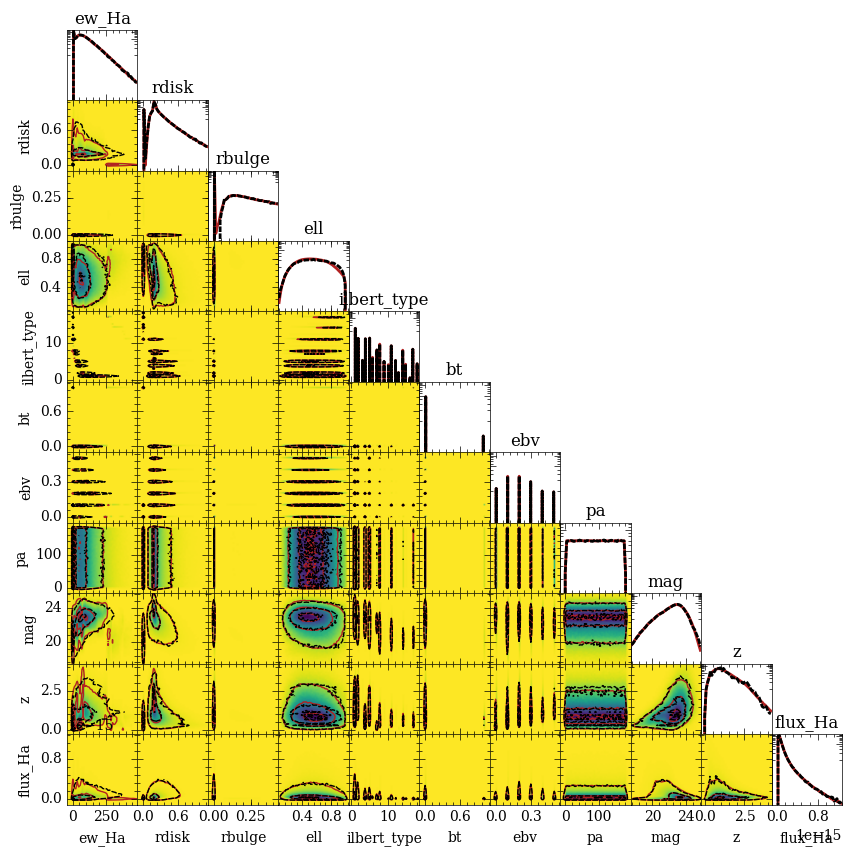

In [26]:
reload(plot_utils)
plot_utils.triangle_plot(data.T, randoms.T, names=S.labels)
plt.show()

In [10]:
def cumulative_dist(x, bins):
    """ """
    h, e = np.histogram(x, bins)
    cum = np.cumsum(h)
    cum = cum * 1. / np.sum(h)
    return cum

data 1851066
rand 1851066
ew_Ha: D=0.00417368725399, c=4.01528019927, a=1.98255878338e-14
rdisk: D=0.00605806209177, c=5.82813595815, a=6.27367606457e-30
rbulge: D=0.00041187403985, c=0.396241878263, a=1.46101577247
ell: D=0.0478988863714, c=46.080944333, a=0.0
ilbert_type: D=0.000373298412914, c=0.35913034077, a=1.54526895675
bt: D=0.000229597431966, c=0.220883349967, a=1.81406153243
ebv: D=8.26550755079e-05, c=0.0795180059883, a=1.97486680191
pa: D=0.00249261776728, c=2.39801359235, a=2.02411843964e-05
mag: D=0.00415302458328, c=3.99540175426, a=2.72608939592e-14
z: D=0.0139843744091, c=13.4536150524, a=1.22078100998e-157
flux_Ha: D=0.00163877612228, c=1.57657843399, a=0.013869654755


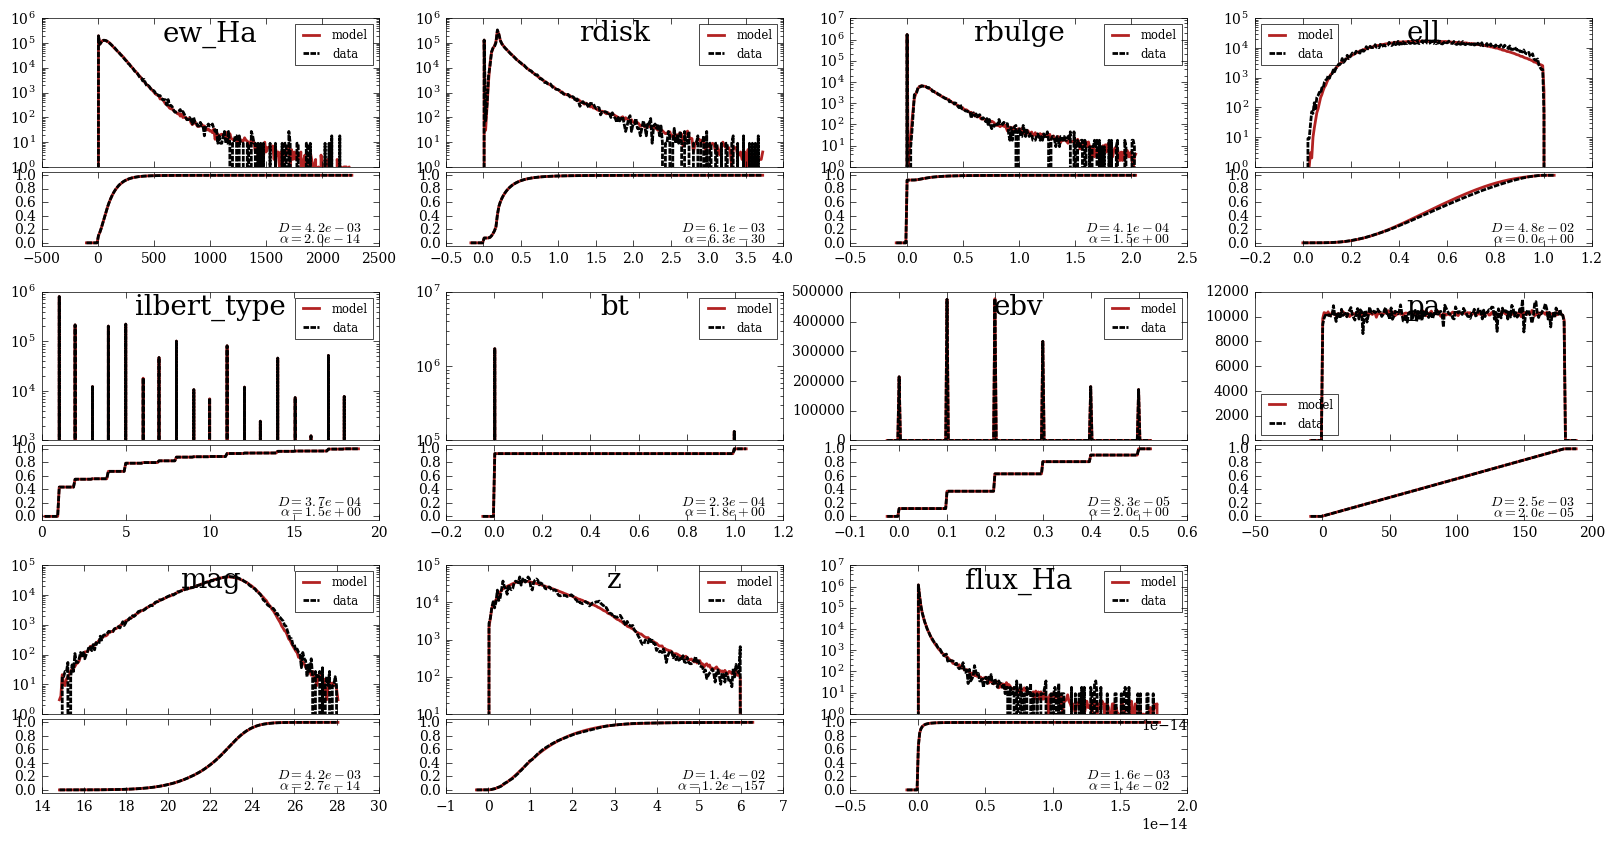

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

pval = [0.5, 0.90, 0.95, 0.99, 0.999]

n, dim = data.shape

print "data",n
print "rand",len(randoms)

fig = plt.figure(figsize=(20,10))
for i in range(dim):
    
    ax = fig.add_subplot(dim//4+1,4,i+1)
    
    divider = make_axes_locatable(ax)
    ax2 = divider.append_axes("bottom", size="50%", pad=0.05)
    fig.add_axes(ax2)

    low, high = np.percentile(data[:,i],[0.01,99.99])
    w = (high - low)/20.
    low -= w
    high += w
#     low = randoms[:,i].min()
#     high = randoms[:,i].max()
    bins = np.linspace(low,high,200)
    bc = (bins[1:]+bins[:-1])/2.
    
    h,e = np.histogram(data[:,i], bins)
    m,e = np.histogram(randoms[:,i], bins)
    
    hc = cumulative_dist(data[:,i], bins)
    mc = cumulative_dist(randoms[:,i], bins)
    
    D = np.abs(hc-mc).max()
    n1 = len(data[:,i])
    n2 = len(randoms[:,i])
    factor = np.sqrt((n1+n2)*1./(n1*n2))
    c = D / factor
    a = 2*np.exp(-2*c*c)
    
    print "{}: D={}, c={}, a={}".format(labels[i],D,c,a)
        
    ax.plot(bc, m, c='firebrick', lw=2, label="model")
    ax.plot(bc, h, c='k', lw=2, dashes=[4,1], label="data")
    
    ax2.plot(bc, mc, c='firebrick', lw=2, label="model")
    ax2.plot(bc, hc, c='k', lw=2, dashes=[4,1], label="data")

    high = h.max()
    low = h[h>0].min()
    if high/low > 10:
        ax.set_yscale('log')
    
    ax.text(0.5, 0.85, S.labels[i], fontsize=20, horizontalalignment='center', transform=ax.transAxes)
    ax2.text(0.95, 0.2, "$D=%3.1e$"%D, horizontalalignment='right', transform=ax2.transAxes)
    ax2.text(0.95, 0.05, "$\\alpha=%3.1e$"%a, horizontalalignment='right', transform=ax2.transAxes)
    ax.legend(loc='best')
    
    a,b = ax.get_xlim()
#     w = (b-a)
#     a -= w/50.
#     b += w/50.
    ax.set_xlim(a, b)
    ax2.set_xlim(a, b)
    ax2.set_ylim(-0.05, 1.05)
    
    plt.setp(ax.get_xticklabels(), visible=False)

plt.show()

In [12]:
labels[3]

u'ell'

In [13]:
print randoms[:,0].min(),randoms[:,0].max()


0.0 237493.417616


In [14]:
x = randoms[:,0]

In [15]:
x.sort()

In [16]:
print x[:100]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
h,e=np.histogram(x, bins=np.linspace(-100,100,100))

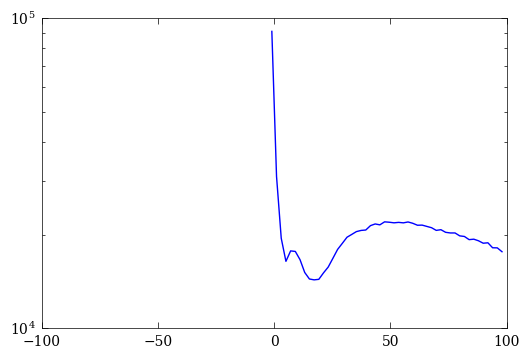

In [18]:
plt.semilogy(e[:-1],h)
plt.show()